# McCabe-Thiele interactive demonstration

This notebook allows one to use interactive sliders to investigate the effects of changing certain inputs on the design of an ideal distillation column. This example is adapted from Wankat (2016: 126) Figure 4-13. It uses ethanol-water VLE data from an attached spreadsheet under the folder named Assets. 

Another example of Binary Distillation with McCabe-Thiele is available here: https://jckantor.github.io/CBE20255/

Wankat, PC (2017) _Separation Process Engineering: Includes Mass Transfer Analysis_, Third ed., Prentice Hall, Boston, MA, ISBN: 9780131382275.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from ipywidgets import interact

In [2]:
# import the data from Excel

df = pd.read_excel('Assets/VLE Ethanol-Water.xlsx')
xdata = df['xE']
ydata = df['yE']

In [3]:
# create a 1-dimensional interpolation function that can give the VLE curve at any intermediate point

f_vle = interp1d(xdata, ydata)
f_vle(0.5)

array(0.65224015)

In [4]:
def McCabe_Thiele(q=1.13, zF=0.2, xB=0.02, xD=0.8, R=1.67):
    """Plot a McCabe-Thiele diagram for binary distillation. 
    The interactive sliders are very sensitive to incorrect values!
    Define xB as a global variable.
    """
    # define the L/V value in terms of R
    L_V = R/(1+R)
    
    # prevent division by 0 when the feed line is vertical
    if q == 1:
        xint = zF
    else:
        # find the intersection of the top and bottom operating lines
        xint = (1/(1-q)*zF - (1-L_V)*xD)/(L_V - q/(q-1))
    yint = L_V*xint + (1-L_V)*xD

    plt.figure()
    plt.grid()
    plt.plot(xdata, ydata)
    plt.scatter(xdata, ydata, s=15)        # VLE datapoints
    plt.plot([0, 1], [0, 1])
    plt.plot([zF, xint], [zF, yint])       # feed line
    plt.plot([xint, xD], [yint, xD])       # top operating line 
    plt.plot([xB, xint], [xB, yint])       # bottom operating line
    plt.text(zF, zF-0.05, 'z$_F$', fontsize=12)
    plt.text(xB, xB-0.05, 'x$_B$', fontsize=12)
    plt.text(xD, xD-0.05, 'x$_D$', fontsize=12)
    plt.xlabel('x$_E$')
    plt.ylabel('y$_E$')
    
    # interpolation functions used for stepping
    f_vle = interp1d(xdata, ydata)
    f_top = interp1d([yint, xD], [xint, xD])
    f_bot = interp1d([xB, yint], [xB, xint])
    
    xop = xB
    yop = xop
    count = 0
    tol = [2, 1] # tolerance is determined by convergece of previous 2 x-values
    
    while tol[-2] - tol[-1] > 0.0: 
        ystage = f_vle(xop)
        if ystage < yint:
            xop2 = f_bot(ystage)
        elif ystage < xD:
            xop2 = f_top(ystage)
            
        tol.append(xD - xop2)
        if tol[-2] - tol[-1] > 0.0:
            plt.plot([xop, xop], [yop, ystage], 'k-') # vertical black step
            plt.plot([xop, xop2], [ystage, ystage], 'b-') # horizontal blue step
            count += 1
            plt.text(xop - 0.01, ystage + 0.03, '{}'.format(count), fontsize=8) # step number
            xop = xop2
            yop = ystage

    ystage = f_vle(xop)
    plt.plot([xop, xop], [yop, ystage], 'k-')
    count += 1
    plt.text(xop - 0.01, ystage + 0.03, '{}'.format(count), fontsize=8)
    plt.plot([xop, xD], [xD, xD], 'b-')
    plt.text(0.4, 0.01, 'Nstages: {}'.format(count), fontsize=12)
    plt.show()

<IPython.core.display.Javascript object>


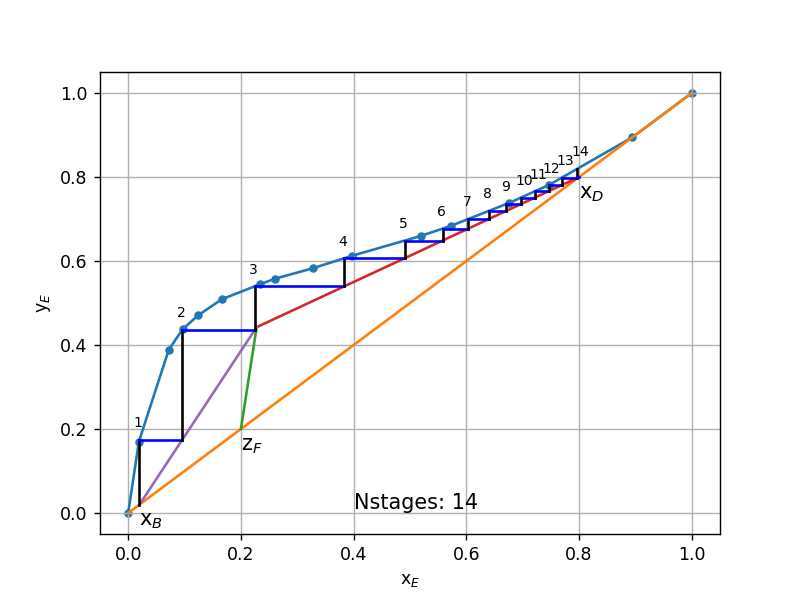

In [5]:
# display a large graph that can be zoomed in

%matplotlib notebook
McCabe_Thiele(q=1.13, zF=0.2, xB=0.02, xD=0.8, R=5/3)

In [6]:
# create a smaller interactive graph

%matplotlib inline
interact(McCabe_Thiele, q=(0.5,1.25,0.01), zF=(0.01,0.4,0.01), xB=(0.01,0.2,0.01), xD=(0.7,0.9,0.01), R=(1.1,5,0.01))

interactive(children=(FloatSlider(value=1.13, description='q', max=1.25, min=0.5, step=0.01), FloatSlider(valu…

<function __main__.McCabe_Thiele(q=1.13, zF=0.2, xB=0.02, xD=0.8, R=1.67)>